In [2]:
! pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 10.5 MB/s eta 0:00:0000:0100:01
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.1/270.1 kB 8.8 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 10.8 MB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
import warnings 
warnings.simplefilter("ignore")

In [11]:
import os
print(os.getcwd())
print(os.path.exists("/Users/annmary/Documents/churn_prediction/notebook/train.csv"))

/Users/annmary/Documents/churn_prediction/notebook
True


In [12]:
dataset=pd.read_csv("/Users/annmary/Documents/churn_prediction/notebook/train.csv")
dataset.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [14]:
dataset.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [24]:
df=dataset.drop(columns=['Unnamed: 0','Booking_ID'])
df.shape

(29020, 18)

In [25]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [26]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [27]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [29]:
df["no_of_adults"].value_counts()
df["no_of_children"].value_counts()
df["no_of_weekend_nights"].value_counts()

no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64

In [30]:
cat_cols=['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']
num_cols=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']
len(cat_cols)
len(num_cols)

12

## Data Analysis

In [31]:
## univariate Analysis
def num_plot(df,nums_features):
    fig, axes=plt.subplots(len(nums_features),2,figsize=(15,len(nums_features)*5))
    if len(nums_features)==1:
        axes=[axes]
    for i ,column in enumerate(nums_features):
        sns.histplot(data=df,x=column,ax=axes[i][0],kde=True,palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")
        
        sns.boxplot(data=df,x=column,ax=axes[i][1],palette="Blues")
        axes[i][1].set_title(f"Box Plot {column}")
    plt.tight_layout()
    plt.show()


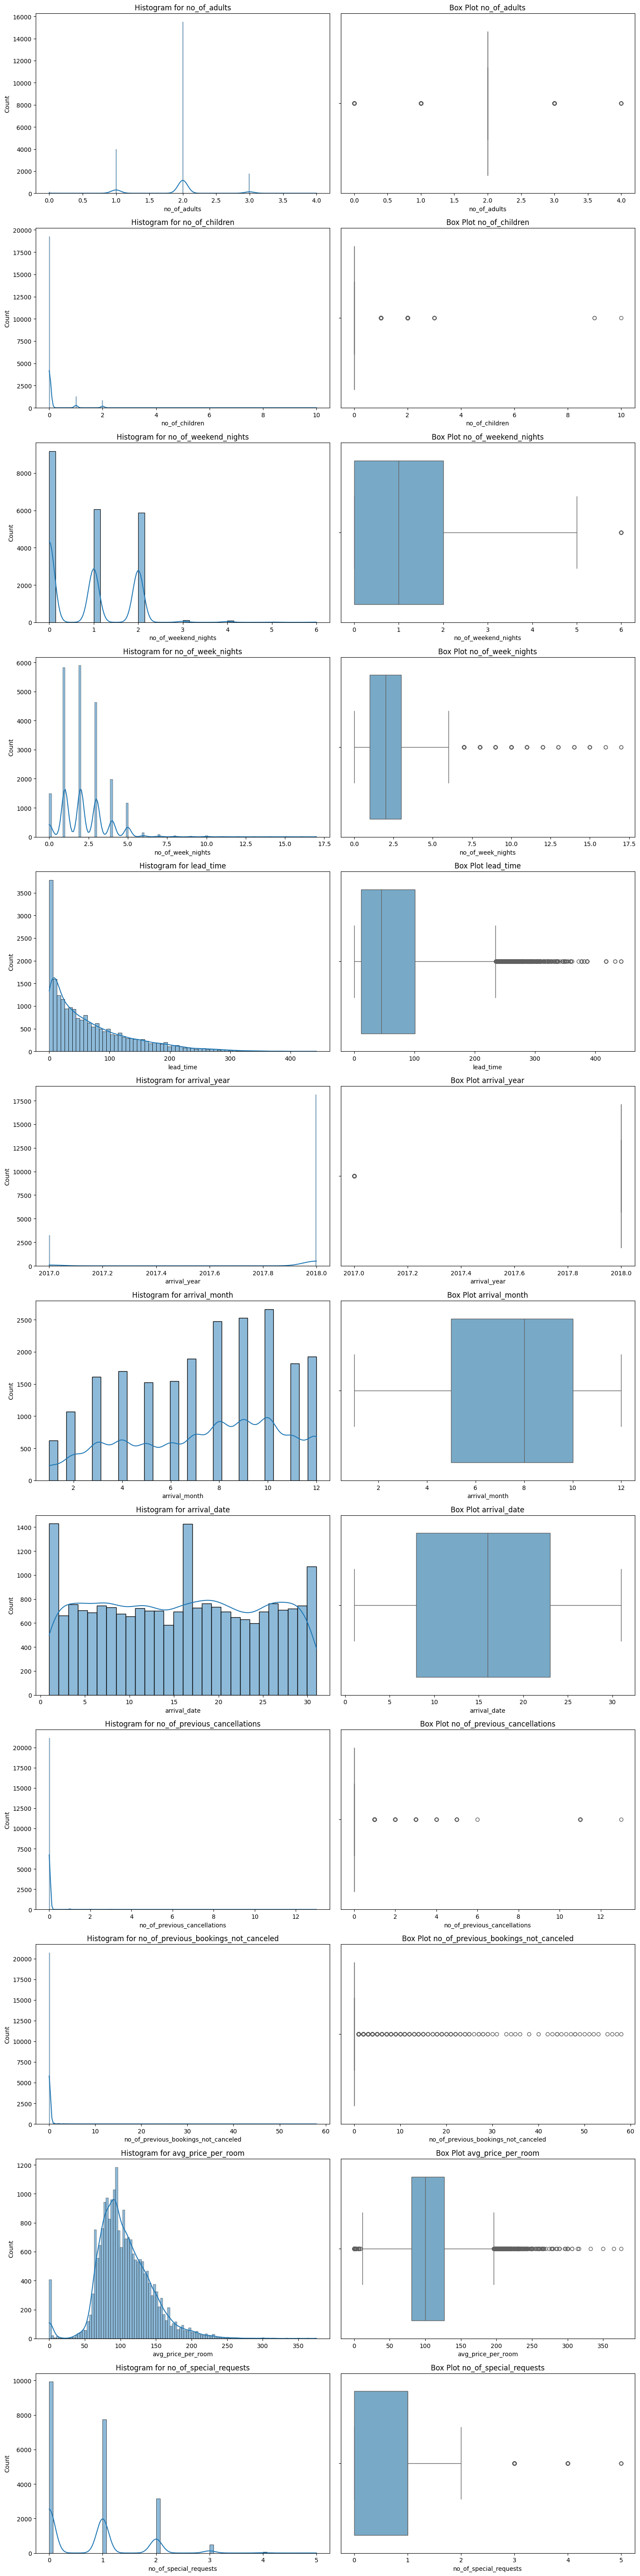

In [32]:
num_plot(df,num_cols)

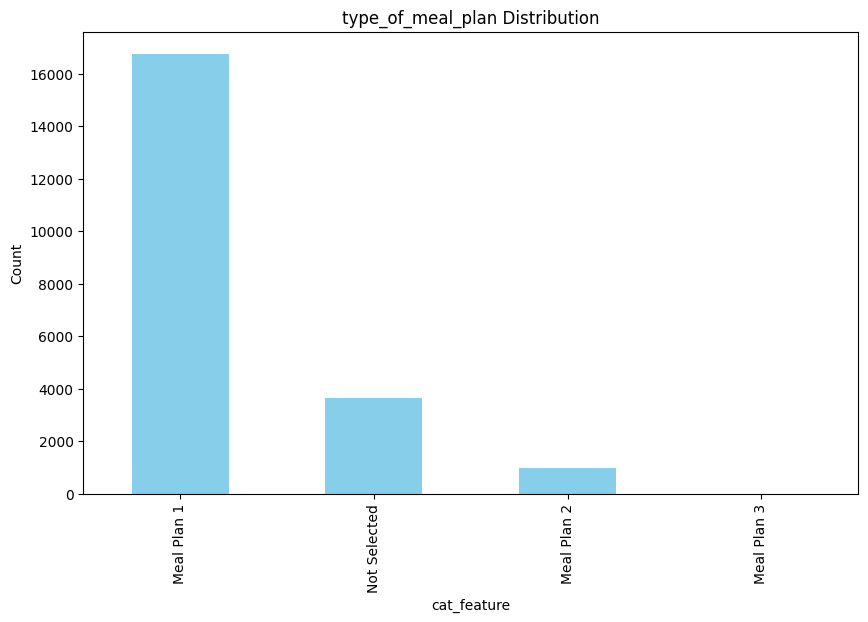

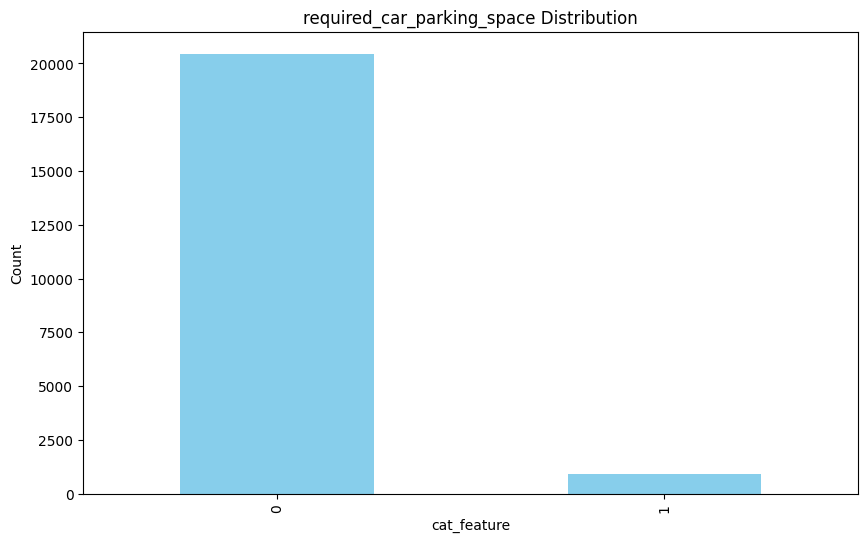

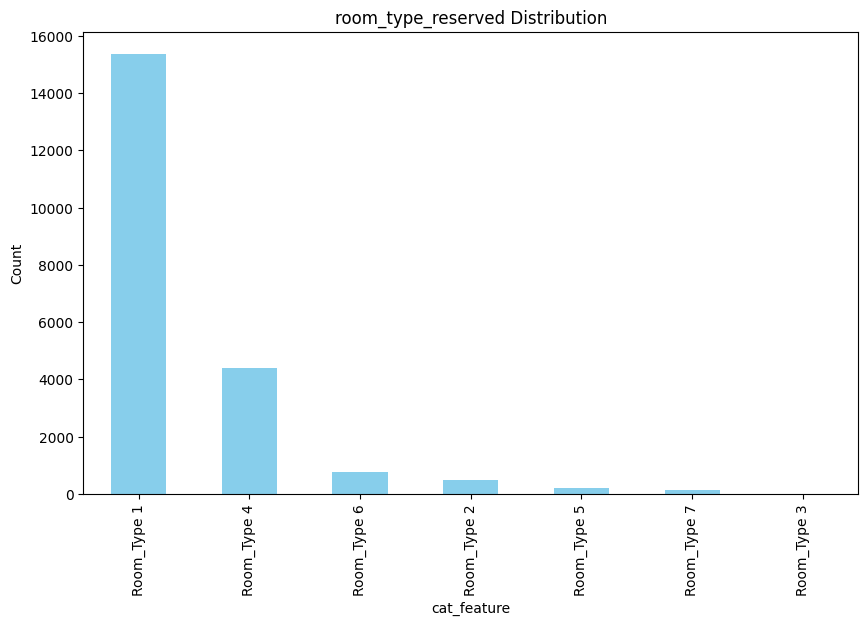

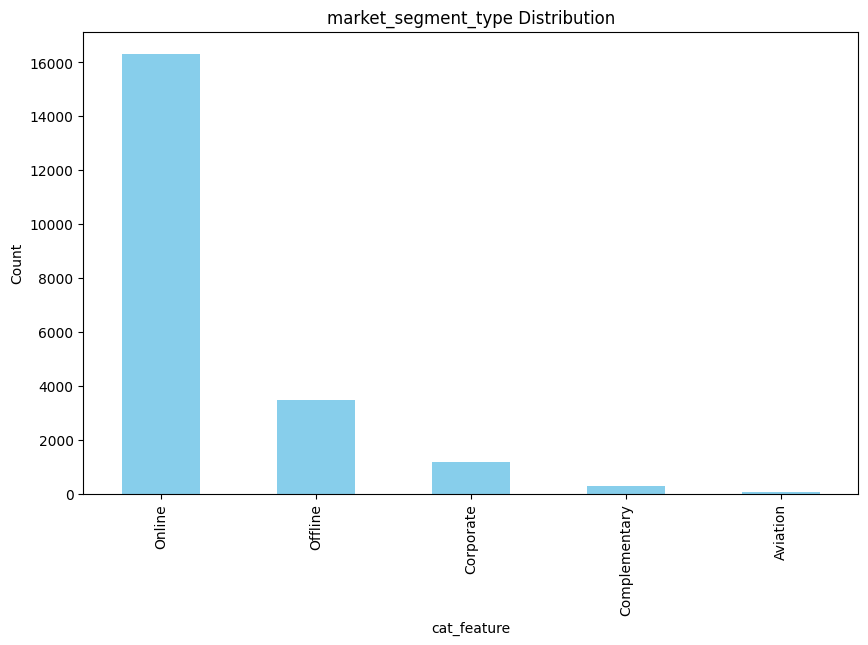

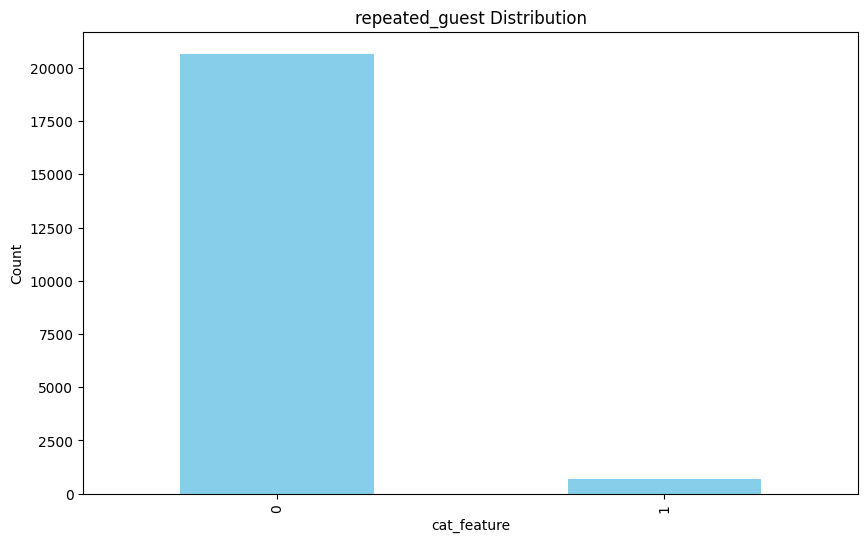

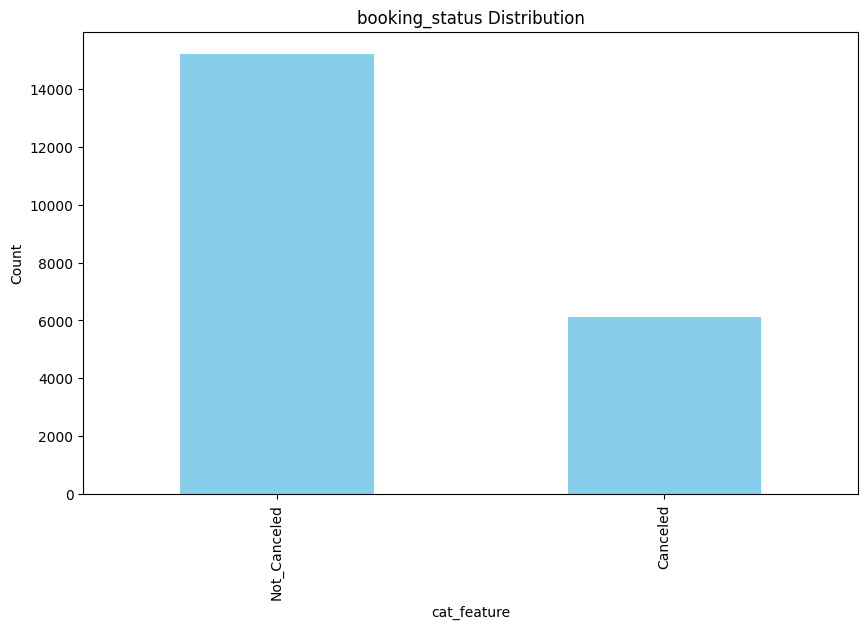

In [34]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    df[cat_feature].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel("cat_feature")
    plt.ylabel("Count")

In [40]:
# bivariate Analysis
def plot_bivariate_num(df,target,num_features):
    num_plots=len(num_features)
    num_rows=(num_plots+1)//2
    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten()
    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i],data=df,palette="Blues")
        axes[i].set_title(f"{column} VS {target}")
    plt.tight_layout()
    plt.show()
    
    

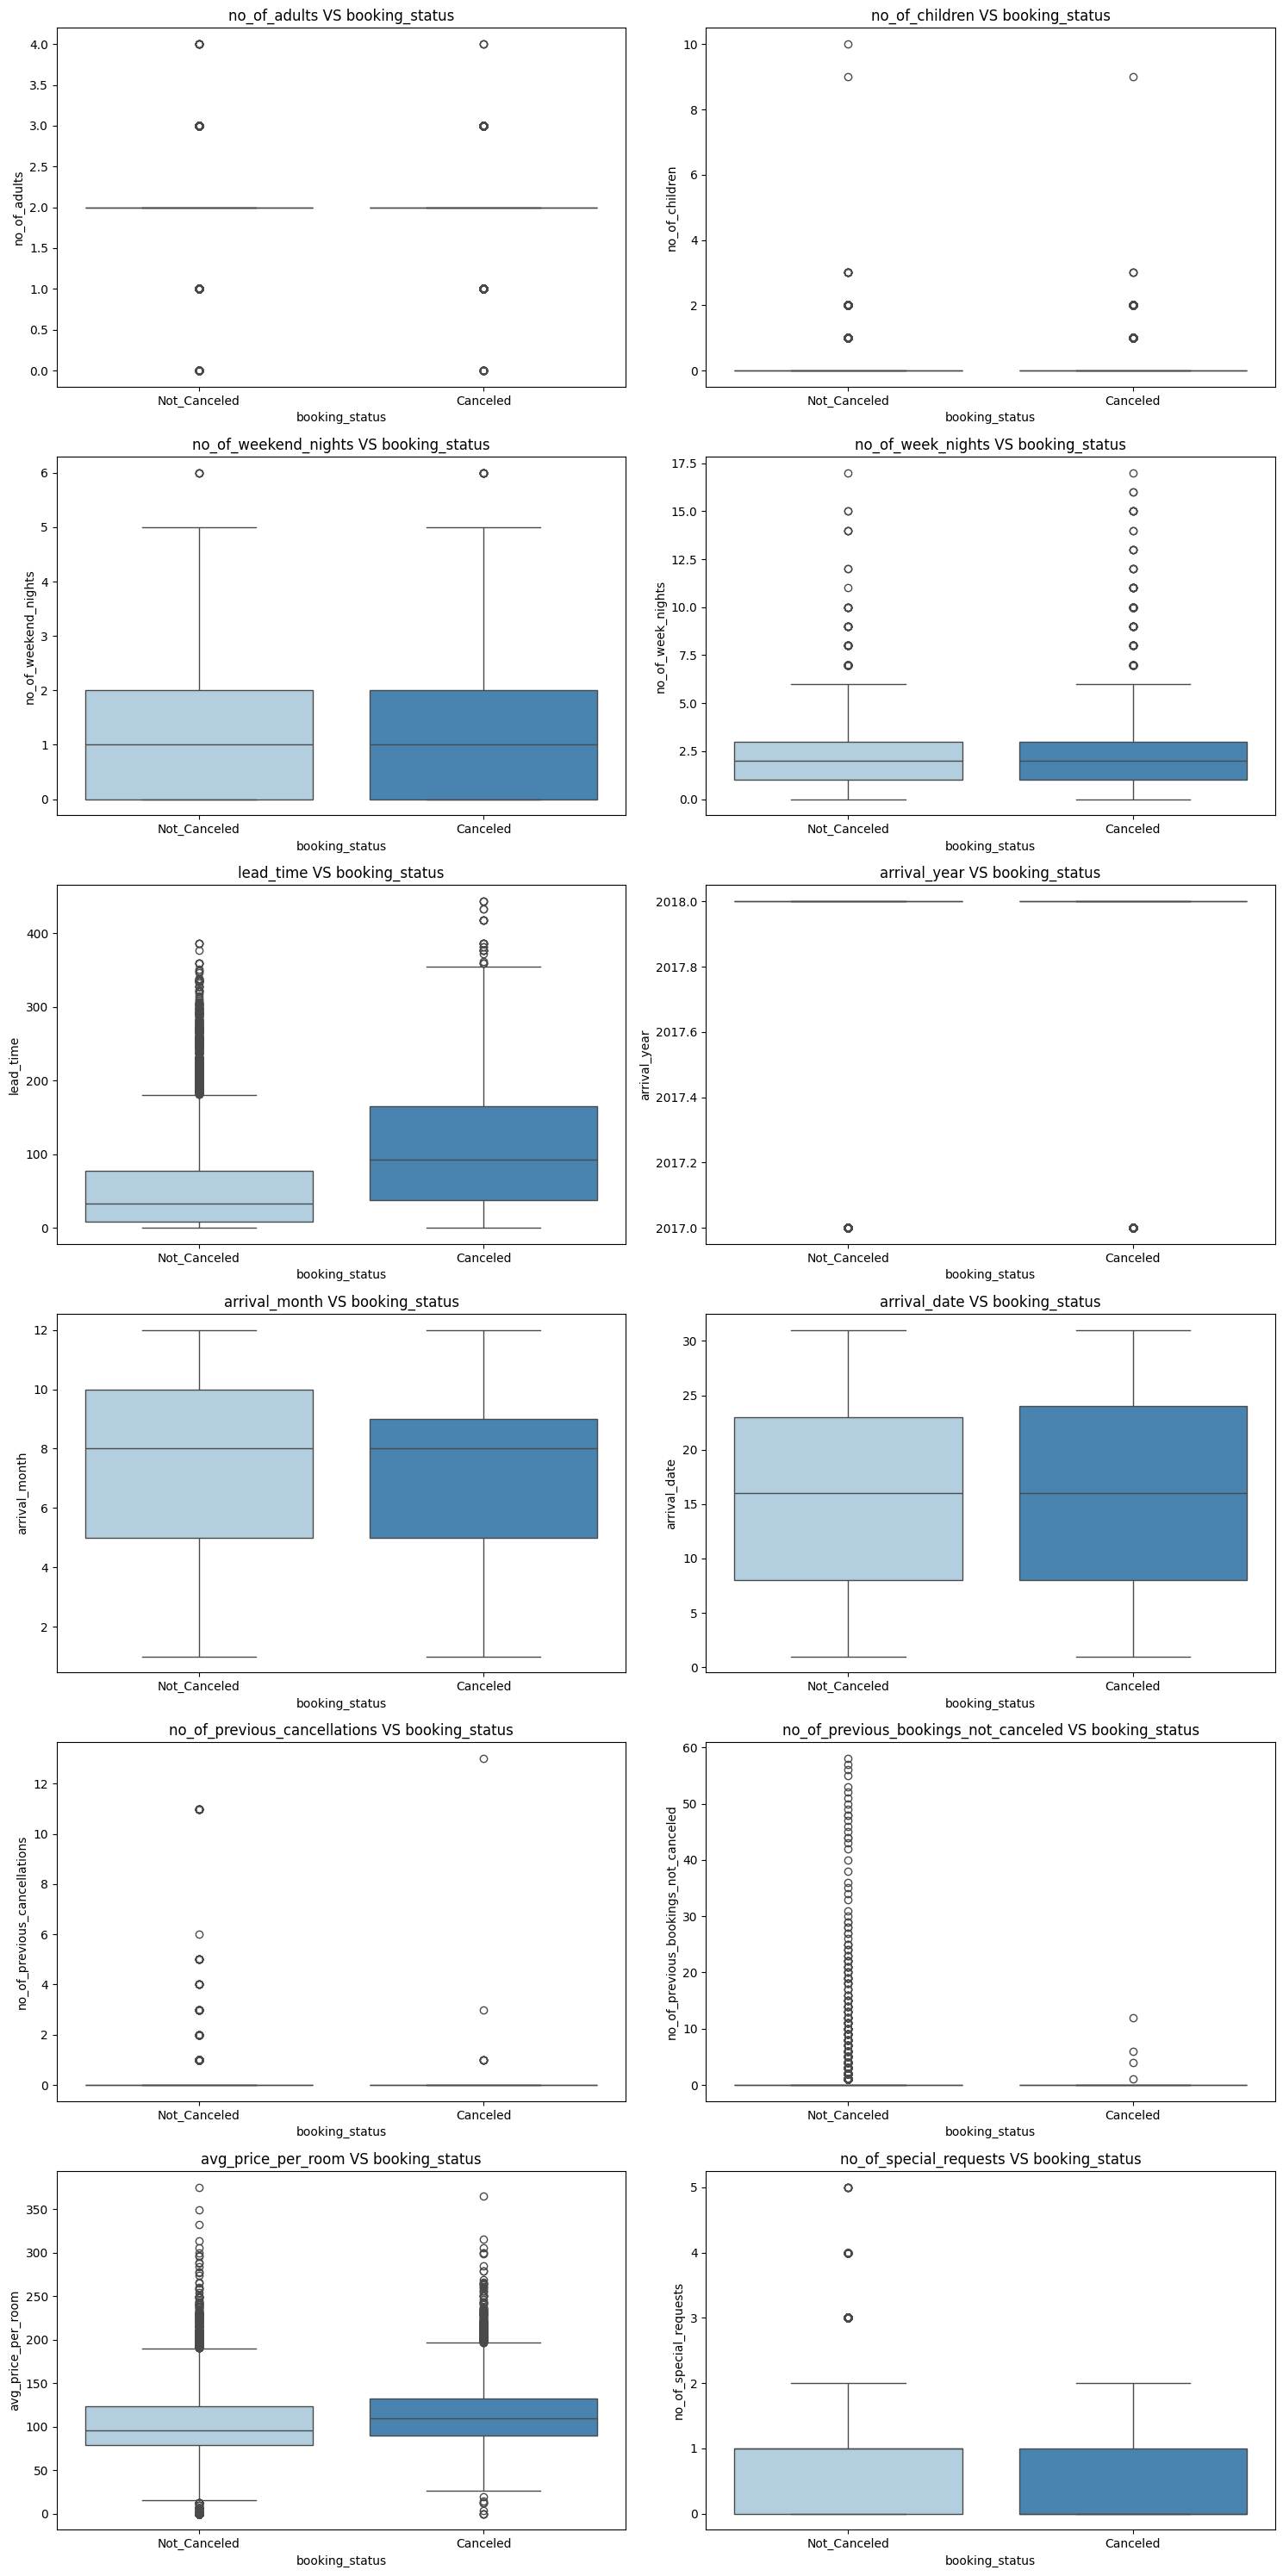

In [41]:
plot_bivariate_num(df,'booking_status',num_cols)

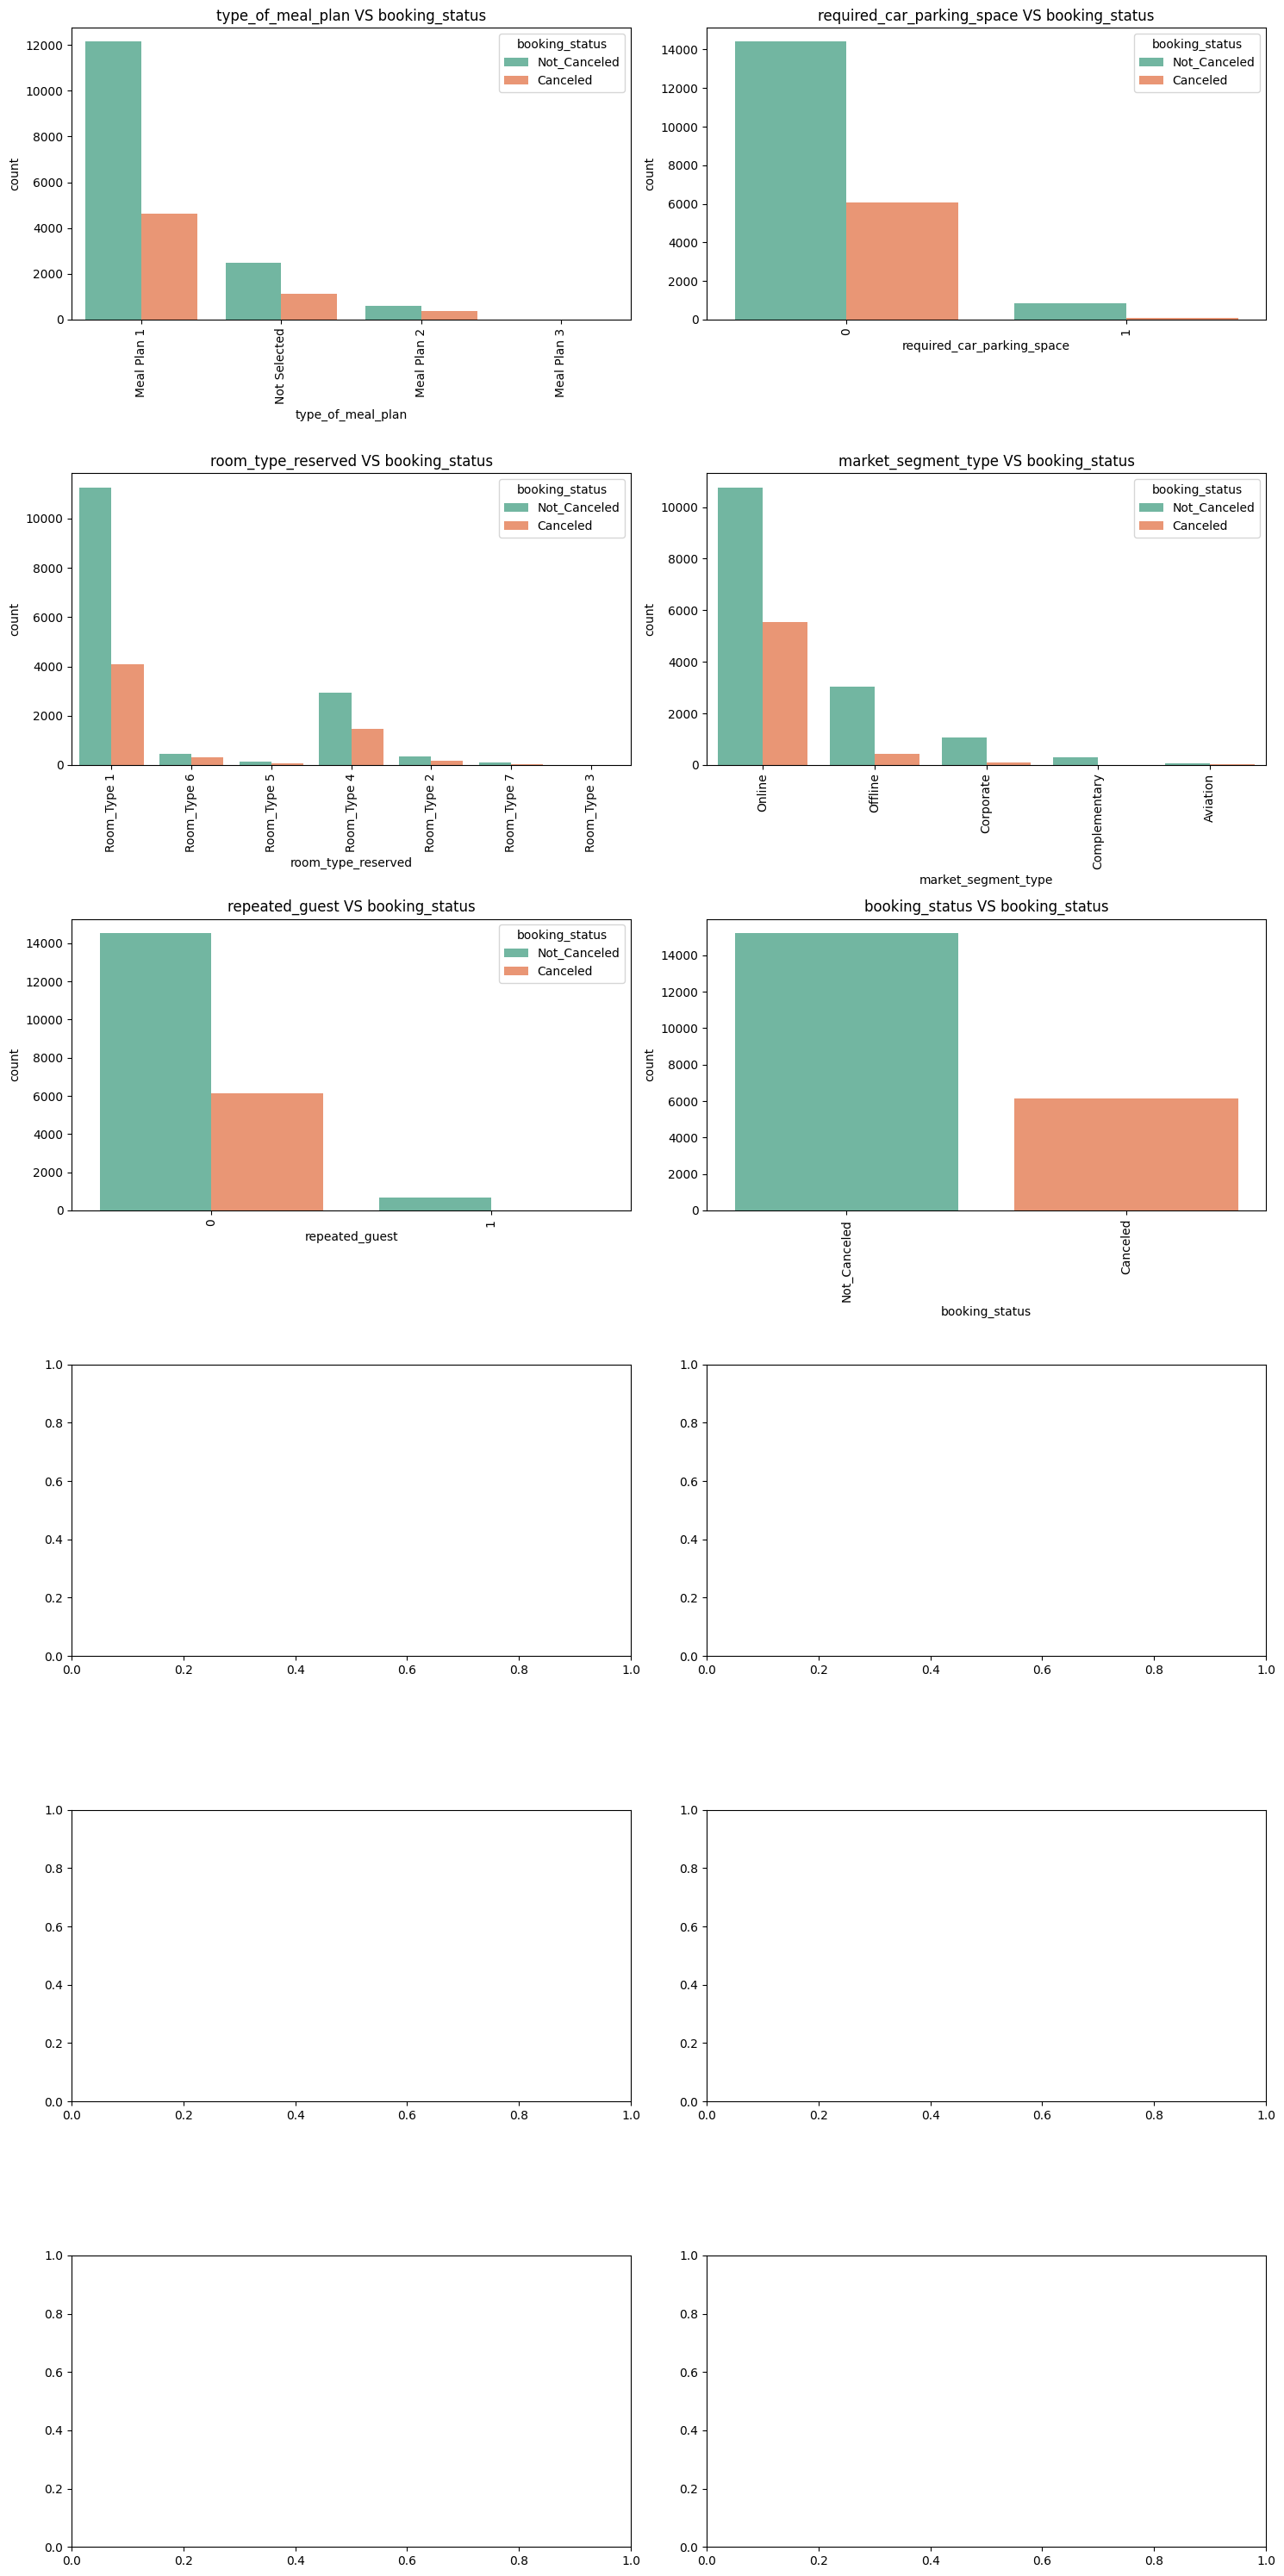

In [42]:
def plot_bivariate_cat(df,target,cat_feature):
    num_features=len(cat_feature)
    num_rows=(num_features+1//2)
    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten()
    
    for i,feature in enumerate(cat_feature):
        sns.countplot(x=feature,hue=target,data=df,palette="Set2",ax=axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x',rotation=90)
    plt.tight_layout()
    plt.show()
plot_bivariate_cat(df,'booking_status',cat_cols)

In [45]:
## Data Processing
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [48]:
## we cannot process object types  so we have to implement encoding here we have to fo label encoding
from sklearn.preprocessing import LabelEncoder


In [50]:
label_encoder=LabelEncoder()
#Mappings:Mappings are essential because label encoding replaces the original text with numbers.
#If you don’t store or track which number corresponds to which label, you lose interpretability and consistency.
mappings={}
for col in cat_cols:
    df[col]=label_encoder.fit_transform(df[col])
    mappings[col]={label:code for label,code in zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_))}

In [51]:
for label,code in mappings.items():
    print(label,code)

type_of_meal_plan {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3)}
required_car_parking_space {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
room_type_reserved {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}
market_segment_type {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}
repeated_guest {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
booking_status {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}


In [52]:
mappings

{'type_of_meal_plan': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [54]:
#Multicolinearity
! pip install statsmodels


  Using cached statsmodels-0.14.5-cp311-cp311-macosx_11_0_arm64.whl (9.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 3.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X=add_constant(df)
vif_data=pd.DataFrame()



In [58]:
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


# since data VIf is not high like 10 so it does not have multi colinearity

#Correlation

In [60]:
corr=df.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

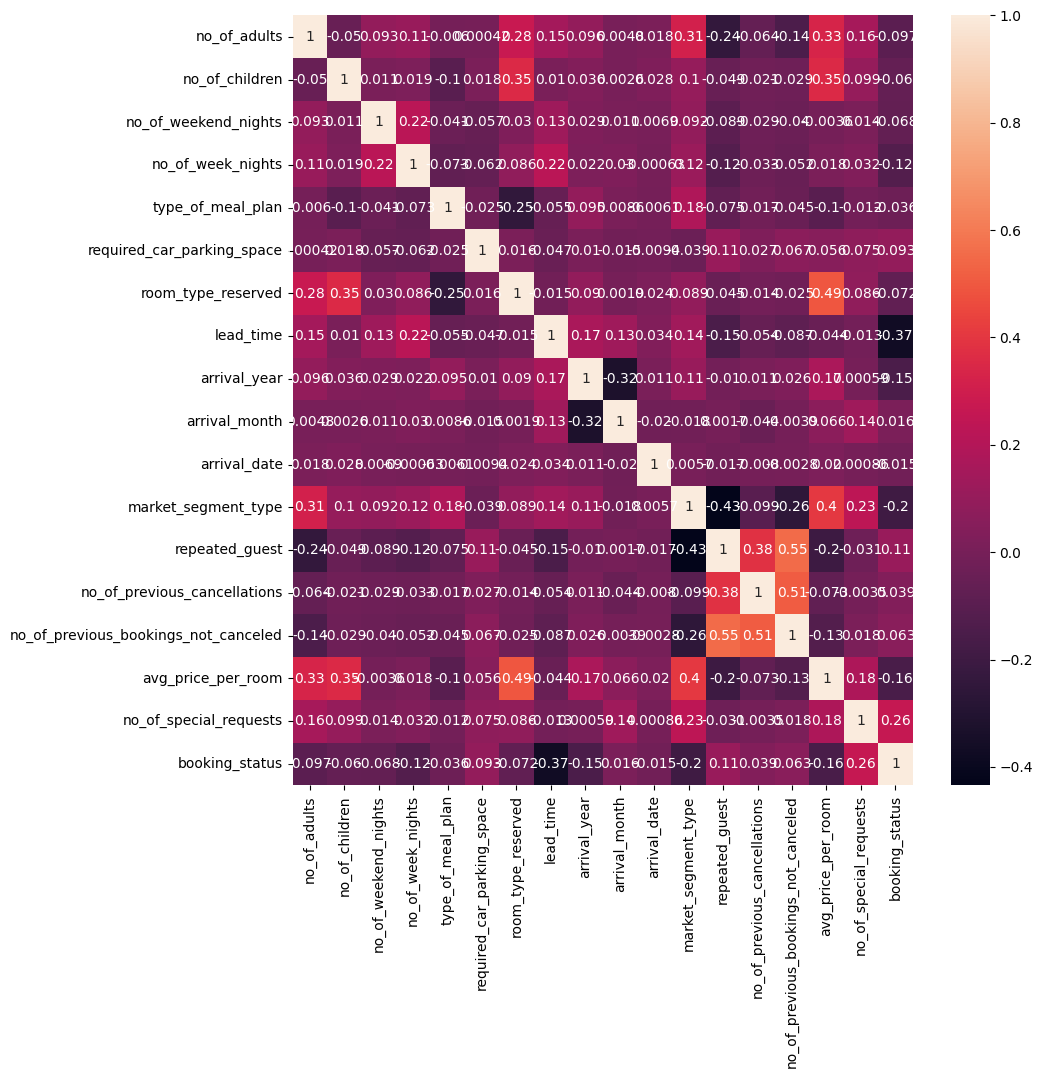

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [64]:
# Skewness
Skewness=df.skew()
Skewness


no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [66]:
for col in df.columns:
    if Skewness[col]>5:
        df[col]= np.log1p(df[col])

In [67]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [69]:
X=df.drop(columns='booking_status')
y=df["booking_status"]


In [70]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [71]:
! pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [72]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)

In [74]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [75]:
balanced_df=pd.DataFrame(X_res,columns=X.columns)
balanced_df["booking_status"]=y_res
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [78]:
balanced_df.shape
df=balanced_df.copy()

In [79]:
#Feature Selection
# we are using random forest feature selection
X=df.drop(columns='booking_status')
y=df["booking_status"]


In [80]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [85]:
feature_importance=model.feature_importances_
feature_importance_df=pd.DataFrame({'feature':X.columns,
                                   'importance':feature_importance})
top_features_importance_df=feature_importance_df.sort_values(by="importance",ascending=False)

In [86]:
top_10_feature_df=top_features_importance_df["feature"].head(10).values
top_10_df=df[top_10_feature_df.tolist()+["booking_status"]]
top_10_df.head(4)

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1


In [87]:
df=top_10_df.copy()

#Model selection

In [89]:
! pip install xgboost lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.4 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


In [92]:
X=df.drop(columns='booking_status')
y=df["booking_status"]

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
classifiers={"Random_Forest":RandomForestClassifier(random_state=42),
             "Logistic Regression":LogisticRegression(random_state=42),
             "Gradient Boosting":GradientBoostingClassifier(random_state=42),
             "Support Vector":SVC(random_state=42),
             "Decision Tree Classifier":DecisionTreeClassifier(random_state=42),
             "KNN":KNeighborsClassifier(),
             "Naive Bayes":GaussianNB(),
             "XGboost":XGBClassifier(random_state=42),
             "ADaboost":AdaBoostClassifier(random_state=42),
             "LGBM":LGBMClassifier(random_state=42)}

In [101]:
metrics={
    "Model":[],
    "Accuracy":[],
    "Precison":[],
    "Recall":[],
    "F1 Score":[]
}

In [103]:
for model_name, classifier in classifiers.items():
    # 1. Train the model
    classifier.fit(X_train, y_train)

    # 2. FIX: Predict only takes X_test
    y_pred = classifier.predict(X_test)

    # 3. Calculate metrics (Assuming all metrics functions are imported)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    # FIX: Use the correct function name: recall_score
    recall = recall_score(y_test, y_pred, zero_division=0)
    
    # 4. Append results
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precison"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [104]:
metrics_df=pd.DataFrame(metrics)

In [105]:
metrics_df

,Model,Accuracy,Precison,Recall,F1 Score
0,Random_Forest,0.889710,0.891574,0.889251,0.890411
1,Logistic Regression,0.775152,0.803571,0.732899,0.766610
2,Gradient Boosting,0.835221,0.817846,0.865798,0.841139
3,Support Vector,0.720171,0.729412,0.706840,0.717949
4,Decision Tree Classifier,0.840144,0.850736,0.828013,0.839221
5,KNN,0.779255,0.855964,0.675570,0.755143
6,Naive Bayes,0.773182,0.803161,0.728339,0.763922
7,XGboost,0.872641,0.868573,0.880456,0.874474
8,ADaboost,0.804366,0.800769,0.814332,0.807494
9,LGBM,0.865255,0.850421,0.888925,0.869247


# Hyperparameter tunning

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X=df.drop(columns='booking_status')
y=df["booking_status"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [117]:
rf=RandomForestClassifier(random_state=42)
params_dist= {
    'n_estimators': randint(100, 500),
    "max_depth": randint(10, 50),
    "min_samples_split": randint(2, 10), # Corrected key
    "min_samples_leaf": randint(1, 5),   # Corrected key
    "bootstrap": [True, False]
}

In [118]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [119]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   3.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   3.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   3.9s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....t 0x15746fc10>, 'min_samples_leaf': <scipy.stats....t 0x15819f790>, 'min_samples_split': <scipy.stats....t 0x15746c890>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [120]:
random_search.best_params_
best_rf_model=random_search.best_estimator_

In [122]:
y_pred=best_rf_model.predict(X_test)

In [123]:
metrics["Model"].append(model_name)
metrics["Accuracy"].append(accuracy)
metrics["Precison"].append(precision)
metrics["Recall"].append(recall)
metrics["F1 Score"].append(f1)

In [124]:
metrics

{'Model': ['Random_Forest',
  'Logistic Regression',
  'Gradient Boosting',
  'Support Vector',
  'Decision Tree Classifier',
  'KNN',
  'Naive Bayes',
  'XGboost',
  'ADaboost',
  'LGBM',
  'LGBM'],
 'Accuracy': [0.8897095027080256,
  0.7751518135565403,
  0.8352207451173478,
  0.7201706876743804,
  0.840144428032168,
  0.7792548826522239,
  0.7731823403906122,
  0.872640735269982,
  0.8043656655178073,
  0.8652552108977515,
  0.8652552108977515],
 'Precison': [0.89157413455258,
  0.8035714285714286,
  0.8178461538461539,
  0.7294117647058823,
  0.8507362784471219,
  0.8559636813867106,
  0.8031609195402298,
  0.868573264781491,
  0.8007687379884689,
  0.8504206918043004,
  0.8504206918043004],
 'Recall': [0.8892508143322475,
  0.7328990228013029,
  0.8657980456026059,
  0.7068403908794788,
  0.8280130293159609,
  0.6755700325732898,
  0.7283387622149837,
  0.8804560260586319,
  0.8143322475570033,
  0.8889250814332248,
  0.8889250814332248],
 'F1 Score': [0.8904109589041096,
  0.7666

In [125]:
# afte rthis save the model using joblib

In [126]:
import joblib

In [127]:
joblib.dump(best_rf_model,"random_forest_model.pkl")
loaded_model=joblib.load("random_forest_model.pkl")

In [128]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0
